In [1]:
import numpy as np

data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Min-max scaling normalization

In [2]:
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

In [3]:
X_b, maxi, mini, avg = mean_normalization(X)

# Gradient Descent Algorithm

1. Pick all the N samples from training data

2. Compute output
   $
   \hat{y} = X\theta
   $

3. Compute loss
   $
   L = \frac{1}{N} (\hat{y} - y)^T (\hat{y} - y)
   $

4. Compute gradient
   $
   k = 2(\hat{y} - y)
   $,
   $
   \nabla L_\theta = X^T k
   $

5. Update parameters
   $
   \theta = \theta - \eta \frac{\nabla L_\theta}{N} \quad
   $


In [4]:
def gradient_descent(X_b, y, n_epochs=50, lr=0.01):
    thetas = np.random.randn(4, 1)

    thetas_path = [thetas]
    losses = []

    for _ in range(n_epochs):
        shuffled_indices = np.random.permutation(N)

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        y_hat = X_b_shuffled.dot(thetas)

        loss = 1/N * (y_hat - y_shuffled).T.dot(y_hat - y_shuffled)
        
        k = 2 * (y_hat - y_shuffled)

        dloss_dtheta = X_b_shuffled.T.dot(k)

        thetas = thetas - lr * dloss_dtheta/N
        
        thetas_path.append(thetas)    
        losses.append(np.mean(loss))

    return thetas_path, losses


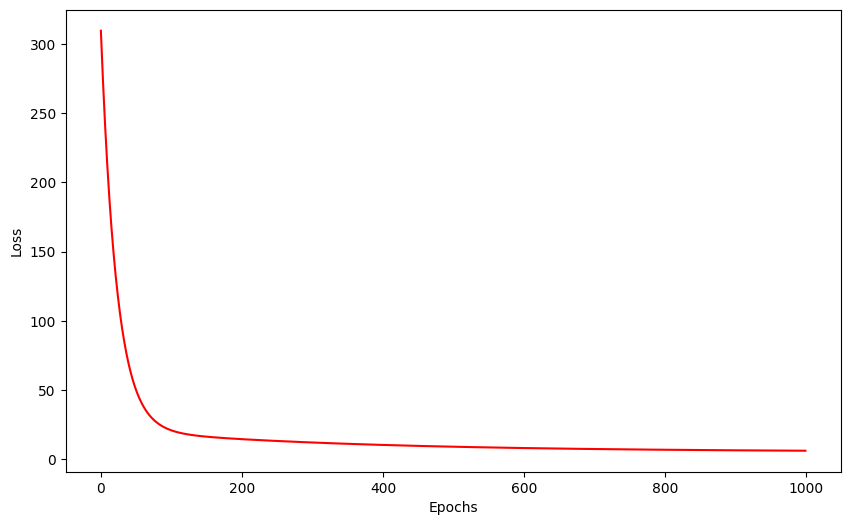

In [5]:
import matplotlib.pyplot as plt
sgd_theta, losses = gradient_descent(X_b, y, n_epochs=1000, lr=0.01)

x_axis = list(range(len(losses)))
plt.figure(figsize=(10, 6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x_axis, losses, color='r')

In [6]:
final_theta = sgd_theta[-1]

def predict(X_new, theta, maxi, mini, avg):
    X_normalized = (X_new - avg) / (maxi - mini)
    X_b_new = np.c_[np.ones((len(X_new), 1)), X_normalized]
    return X_b_new.dot(theta)

X_test = X[0:3]

y_pred = predict(X_test, final_theta, maxi, mini, avg)
for i, pred in enumerate(y_pred):
    print(f"Sample {i+1}: {pred[0]:.2f}")

Sample 1: 18.84
Sample 2: 10.41
Sample 3: 9.07


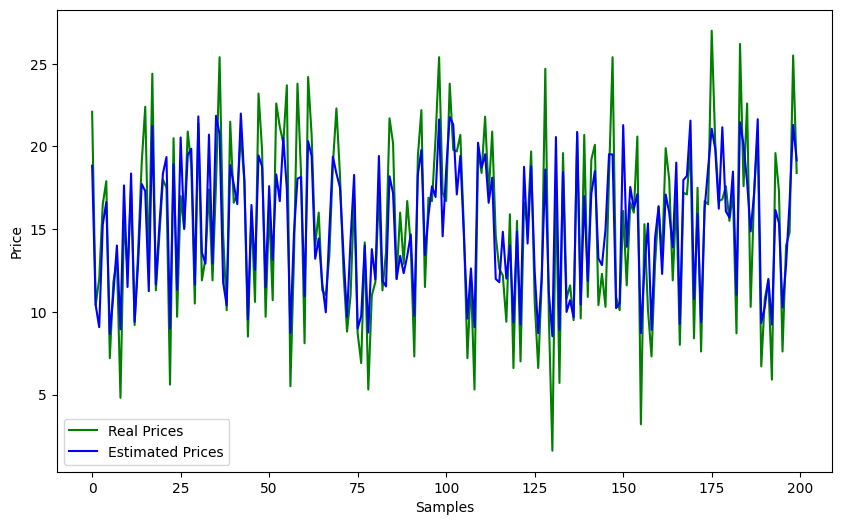

In [7]:
def visualize_predict_gt(features_X, theta, sales_Y):
    estimated_prices = features_X.dot(theta)
    
    plt.figure(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt(X_b, final_theta, y)

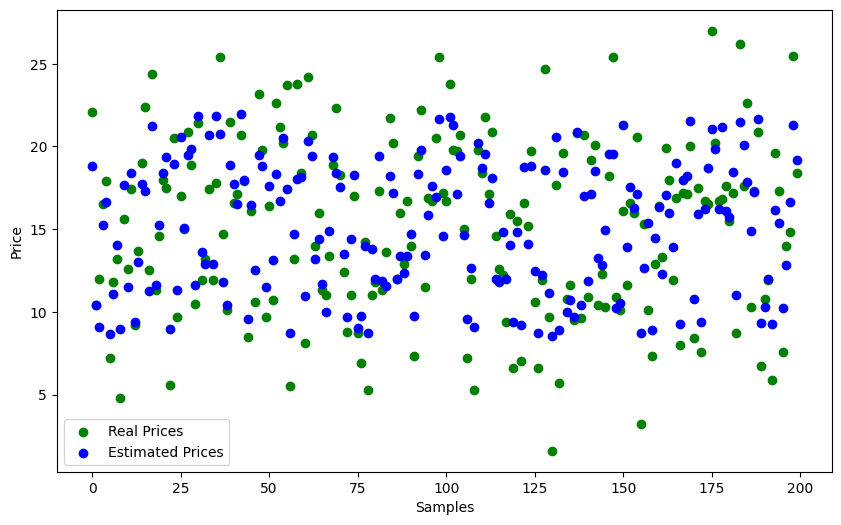

In [8]:
estimated_prices = []
samples = [i for i in range(len(X_b))]
for feature in X_b:
    estimated_price = sum(c*x for x, c in zip(feature, final_theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))

plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()